<a href="https://colab.research.google.com/github/jfernandez37/495Project/blob/main/Directed_consulting_495.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.io as sio
import plotly
import matplotlib.pyplot as plt

In [2]:
stuff=sio.loadmat("iFarmData(2015)_1_28_2019.mat")

In [3]:
#print(stuff)

In [4]:
print(type(stuff))
print(type(stuff['Pr_Crop_US']))

<class 'dict'>
<class 'numpy.ndarray'>


<function matplotlib.pyplot.show>

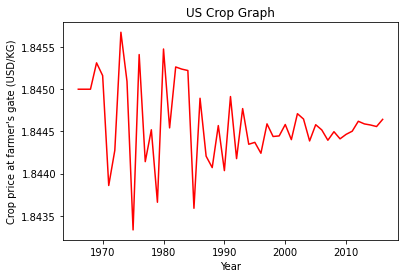

In [5]:
y=stuff['Pr_Crop_US'][2][1]
#print(len(stuff['Pr_Crop_US'][0][0]))
x=np.arange(1966,2021)
plt.title("US Crop Graph")
plt.xlabel("Year")
plt.ylabel("Crop price at farmer's gate (USD/KG)")
plt.plot(x,y,color="red")
plt.show

The crop price starts to stabalize around the time that nafta was enacted (1994)

55


<function matplotlib.pyplot.show>

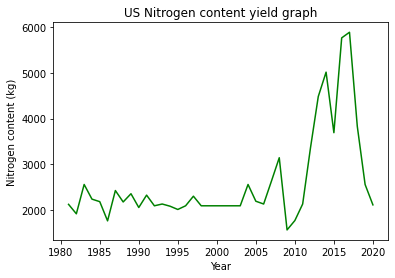

In [12]:
y=stuff['Nyield_kgkm'][0][1]
print(len(stuff['Pr_Crop_US'][0][1]))
x=np.arange(1966,2021)
plt.title("US Nitrogen content yield graph")
plt.xlabel("Year")
plt.ylabel("Nitrogen content (kg)")
plt.plot(x,y,color="green")
plt.show